In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
import os
os.chdir('..')
from modules.utils import *

# Step1.  스티커 구하기
## 원본 이미지를 살펴보자
### 얼굴 이미지
뭐가 좋다고 빵긋 웃는지 이유 모를 미소가 인상적이다

/home/aiffel0042/DOS/AIFFEL_Exploration_reference/exp_03/images/my_face.JPG


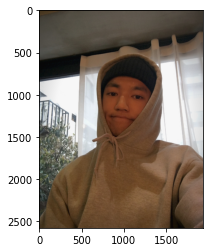

In [4]:
img_rgb, img_bgr = getimage(os.getcwd() + '/images', '/my_face.JPG')

### 스티커 이미지
고양이 수염을 얼굴에 붙이는 실습을 해보려고 한다.

/home/aiffel0042/DOS/AIFFEL_Exploration_reference/exp_03/images/cat-whiskers.png


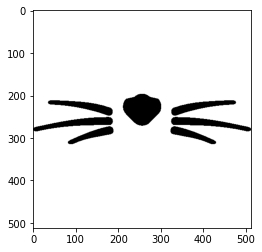

In [6]:
sticker_rgb, sticker_bgr = getimage(os.getcwd() + '/images', '/cat-whiskers.png')

스티커를 회전시키면 이미지 사이즈가 달라지면서  
새롭게 채워지는 영역(양쪽 네 모퉁이)이 0으로 즉 콧수염과  
색상 정보가 똑같아진다.  
이를 방지하기 위해 먼저 이미지를 반전시킨다.

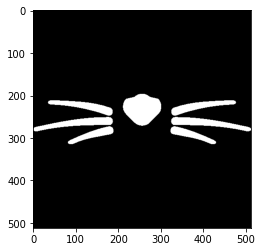

In [7]:
sticker_re = color_reverse(sticker_rgb)

### 실습에 사용하기 위한 이미지로 바꿔보자

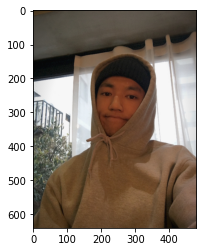

In [8]:
img_resized = img_resize(img_rgb, 480, 640)
img_re = img_resized.copy()

# step 2. 얼굴 검출 & 랜드마크 검출 하기

## Dlib을 활용해 HOG detector를 선언해보자

In [9]:
img_bbox, dlib_rects = face_detector(img_resized, pyramid=1)

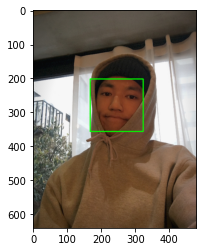

In [10]:
plt.imshow(img_bbox)

In [11]:
type(dlib_rects[0])

_dlib_pybind11.rectangle

## Dlib landmark 찾기

# Step 3. 스티커 적용 위치 확인하기  
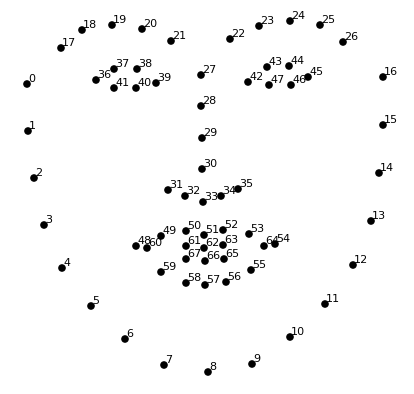  
  
고양이 수염의 코 부분이 얼굴 사진의 코 위치에 와야한다.  
귀척할려고 얼굴을 살짝 기운거 같은데 스티커가 자연스럽게 합성될지 고민이다.  
  
코에서 평행한 곳에 위치한 볼쪽 랜드마크 2번 14번 사이의 길이를 구한다음  
스티커의 까만 코 부분이 얼굴의 코 중앙에 위치시키 위해  
스티커의 중앙 부가 랜드마크 33번과 30번 사이에 올 수 있게 조정한다.

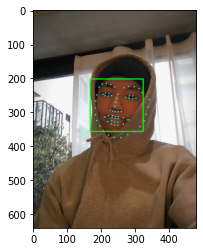

In [12]:
list_landmarks, list_points, img_bbox = get_landmark(img_bbox, dlib_rects)

In [13]:
refined_x, refined_y, sticker = set_sticker(dlib_rects, list_landmarks, sticker_re)

(x,y):(239,290)
(w,h):(149,149)
rotation : (42)


# Step 4. 스티커 적용하기

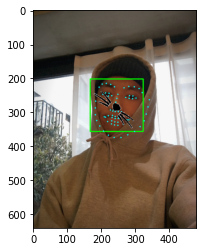

In [14]:
attach_sticker(img_bbox, sticker, refined_x, refined_y)

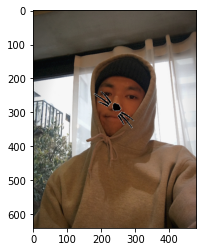

In [15]:
attach_sticker(img_re, sticker, refined_x, refined_y)

## 다양한 변화를 준 이미지에 얼굴검출 확인하기
### 1. 얼굴 각도
다양한 표정과 각도를 가지고 있는 인물사진을 사용하여  
단순한 정면사진이 아니라 다른 각도와 다양한 표정에서 얼굴이 검출되는지 확인해보자

/home/aiffel0042/DOS/AIFFEL_Exploration_reference/exp_03/images/face_angle.jpg


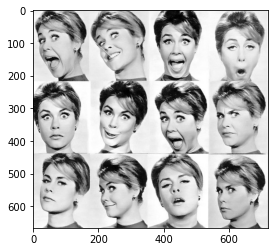

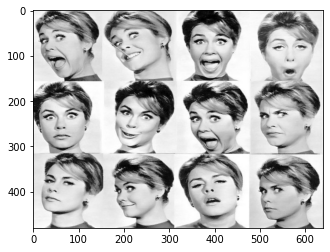

In [17]:
img_rgb, img_bgr = getimage(os.getcwd() + '/images', '/face_angle.jpg')
img_resized = img_resize(img_rgb, 640, 480)
img_og = img_resized.copy()

/home/aiffel0042/DOS/AIFFEL_Exploration_reference/exp_03/images/cat-whiskers.png


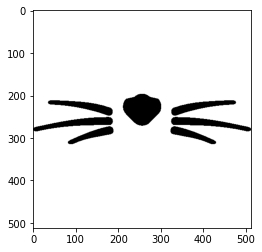

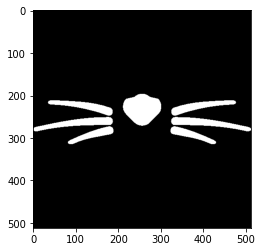

In [18]:
sticker_rgb, sticker_bgr = getimage(os.getcwd() + '/images', '/cat-whiskers.png')
sticker_re = color_reverse(sticker_rgb)

In [19]:
img_bbox, dlib_rects = face_detector(img_resized, pyramid=1)

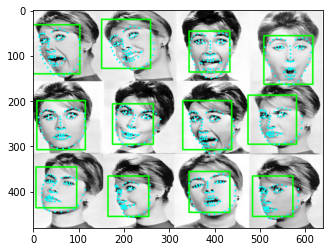

In [20]:
list_landmarks, list_points, img_bbox = get_landmark(img_bbox, dlib_rects)

In [21]:
refined_xs, refined_ys, stickers = set_sticker(dlib_rects, list_landmarks, sticker_re, discribe=False)

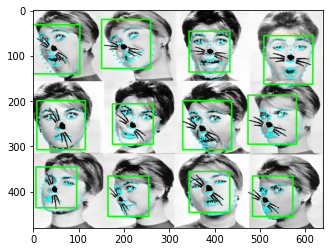

In [22]:
attach_sticker(img_bbox, stickers, refined_xs, refined_ys)

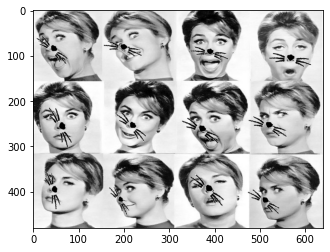

In [23]:
attach_sticker(img_og, stickers, refined_xs, refined_ys)

### 2. 서로 다른 거리에 있는 경우
거리에 따른 얼굴 영역 검출이 잘 되는지 확인해보자.  
다른 뜻은 없고 다양한 거리에 위치한 인물 사진을 찾다보니 발견한 사진이다.  
(우울할땐 <a href='https://youtu.be/4n8vvjlNwik'>돌핀</a>이란 노래를 들어보자)

/home/aiffel0042/DOS/AIFFEL_Exploration_reference/exp_03/images/ohmy.jpg


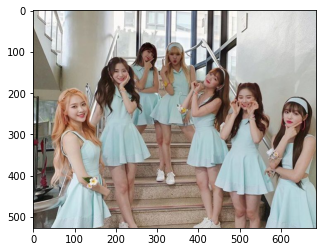

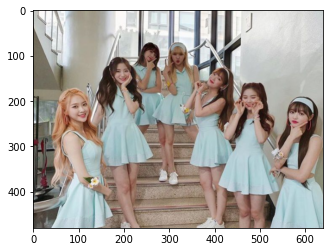

In [26]:
img_rgb, img_bgr = getimage(os.getcwd() + '/images', '/ohmy.jpg')
img_resized = img_resize(img_rgb, 640, 480)
img_og = img_resized.copy()

/home/aiffel0042/DOS/AIFFEL_Exploration_reference/exp_03/images/cat-whiskers.png


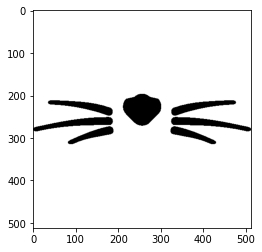

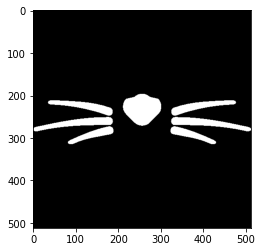

In [27]:
sticker_rgb, sticker_bgr = getimage(os.getcwd() + '/images', '/cat-whiskers.png')
sticker_re = color_reverse(sticker_rgb)

In [28]:
img_bbox, dlib_rects = face_detector(img_resized, pyramid=1)

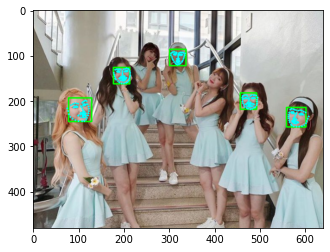

In [29]:
list_landmarks, list_points, img_bbox = get_landmark(img_bbox, dlib_rects)

In [30]:
refined_xs, refined_ys, stickers = set_sticker(dlib_rects, list_landmarks, sticker_re, discribe=False)

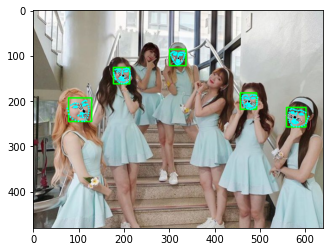

In [31]:
attach_sticker(img_bbox, stickers, refined_xs, refined_ys)

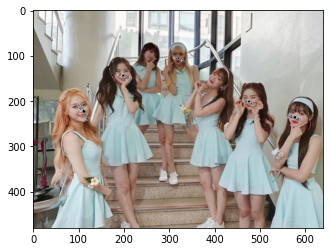

In [32]:
attach_sticker(img_og, stickers, refined_xs, refined_ys)

### 3. 다양한 밝기의 인물사진
누군진 모르겠지만 밝기를 다르게한 동일한 사진을 찾던 중 발견한 사진이다.  
밝기가 달라져도 얼굴영역을 잘 찾아내는지 확인해 보자.

/home/aiffel0042/DOS/AIFFEL_Exploration_reference/exp_03/images/test.jpg


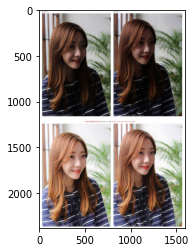

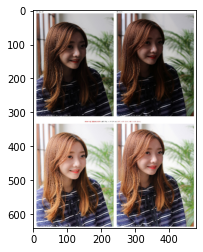

In [33]:
img_rgb, img_bgr = getimage(os.getcwd() + '/images', '/test.jpg')
img_resized = img_resize(img_rgb, 480, 640)
img_og = img_resized.copy()

In [34]:
img_bbox, dlib_rects = face_detector(img_resized, pyramid=3)

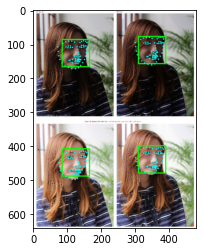

In [35]:
list_landmarks, list_points, img_bbox = get_landmark(img_bbox, dlib_rects)

In [36]:
refined_xs, refined_ys, stickers = set_sticker(dlib_rects, list_landmarks, sticker_re, discribe=False)

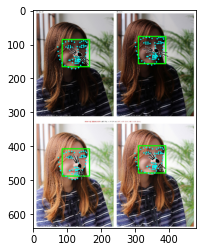

In [37]:
attach_sticker(img_bbox, stickers, refined_xs, refined_ys)

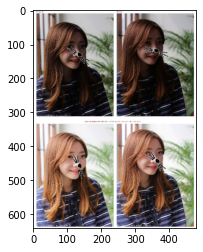

In [38]:
attach_sticker(img_og, stickers, refined_xs, refined_ys)